In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import os

# List files in the root of My Drive
base_path = '/content/drive/My Drive'
files = os.listdir(base_path)

print("Files in My Drive:", files)


Files in My Drive: ['Getting started.pdf', 'CamScanner 10-19-2020 11.38.35.pdf', 'kalpana Guggari.pdf', 'navodaya form.pdf', 'Kalpana 2KL19BM003 .pdf', 'format-for-certificate-4-&-5-salary-certificate-&-affidavit-for-agriculturist-quota-candidates.pdf', 'kcet2021.pdf', 'physics-formulas.pdf', ' manoj cet Hall ticket', ' cet Hall.pdf', 'Print Status.pdf', 'Mahesh.pdf', 'PG.pdf', '18EMAB102 MVC 2021-22 EVEN MSSCET (1).pdf', 'Invoice (2).pdf', 'EAadhaar_2825025220160920221001123205_0610202219038.pdf', 'State Scholarship Portal.pdf', 'Classroom', 'IMG-20240520-WA0001.jpg', 'Photo from Mahesh Dindur', 'payment-receipt.pdf', 'Screenshot (65).png', 'Family Update.gsite', 'MaheshDindur.pdf', 'Admit Card(nqt).pdf', 'Colab Notebooks', 'Antispoofing_datasets', 'antispoofing_big.zip']


In [27]:
!cp '/content/drive/My Drive/antispoofing_big.zip' .


In [28]:
import os

# Check if the file exists
if os.path.exists('./antispoofing_big.zip'):
    print("File successfully copied to the current directory.")
else:
    print("File not found in the current directory.")


File successfully copied to the current directory.


In [29]:
import zipfile

# Path to the ZIP file
zip_file_path = './antispoofing_big.zip'

# Define the extraction path
extract_path = './final_antispoofing'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [31]:
dataset_dir ='/content/final_antispoofing/final_antispoofing'

In [32]:
train_dataset_dir ='/content/final_antispoofing/final_antispoofing/train'
test_dataset_dir ='/content/final_antispoofing/final_antispoofing/test'


In [2]:
import os

os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')



In [34]:

train_dir = '/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

In [35]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [37]:
import shutil
import os

def train_test_splits(data_directory):
    for split_type in os.listdir(data_directory):
        path_to_split_type = os.path.join(data_directory, split_type)
        for category in os.listdir(path_to_split_type):
            path_to_category = os.path.join(path_to_split_type, category)
            # Iterate directly through person's folders
            for subject in os.listdir(path_to_category):
                path_to_subject = os.path.join(path_to_category, subject)
                # Iterate through images in person's folder
                for img in os.listdir(path_to_subject):
                    # Construct destination path based on split_type and category
                    destination_path = os.path.join(
                        train_dir if split_type == 'train' else test_dir,
                        category,
                        img  # Using the original image name
                    )

                    # Copy the image to the destination
                    shutil.copy(os.path.join(path_to_subject, img), destination_path)

# Call the function with your dataset directory
train_test_splits(data_directory=dataset_dir)

# Data Exploration

In [38]:
categories = ['real','spoof']

In [39]:
print("-------------------------Exploring Training Datasets-------------------------")
for category in categories:
    path = os.path.join(train_dir, category)
    if category == 'real':
        r1 = len(os.listdir(path))
    else:
        r1 = len(os.listdir(path))
    print("There are {} images in {} directory".format(len(os.listdir(path)), path))

print("-------------------------Exploring Testing Datasets-------------------------")
for category in categories:
    path = os.path.join(test_dir, category)
    if category == 'real':
        r2 = len(os.listdir(path))
    else:
        r2 = len(os.listdir(path))
    print("There are {} images in {} directory".format(len(os.listdir(path)), path))


-------------------------Exploring Training Datasets-------------------------
There are 3896 images in /content/antispoofing_dataset/train/real directory
There are 3585 images in /content/antispoofing_dataset/train/spoof directory
-------------------------Exploring Testing Datasets-------------------------
There are 1429 images in /content/antispoofing_dataset/test/real directory
There are 1308 images in /content/antispoofing_dataset/test/spoof directory


In [40]:
print("-------------------------Exploring Training Datasets-------------------------")
total_train_images = 0  # Initialize counter for total training images
for category in categories:
    path = os.path.join(train_dir, category)
    if category == 'real':
        r1 = len(os.listdir(path))
    else:
        r1 = len(os.listdir(path))
    total_train_images += r1  # Add to total count
    print("There are {} images in {} directory".format(r1, path))

print("Total images in training dataset:", total_train_images)

print("-------------------------Exploring Testing Datasets-------------------------")
total_test_images = 0  # Initialize counter for total testing images
for category in categories:
    path = os.path.join(test_dir, category)
    if category == 'real':
        r2 = len(os.listdir(path))
    else:
        r2 = len(os.listdir(path))
    total_test_images += r2  # Add to total count
    print("There are {} images in {} directory".format(r2, path))

print("Total images in testing dataset:", total_test_images)


-------------------------Exploring Training Datasets-------------------------
There are 3896 images in /content/antispoofing_dataset/train/real directory
There are 3585 images in /content/antispoofing_dataset/train/spoof directory
Total images in training dataset: 7481
-------------------------Exploring Testing Datasets-------------------------
There are 1429 images in /content/antispoofing_dataset/test/real directory
There are 1308 images in /content/antispoofing_dataset/test/spoof directory
Total images in testing dataset: 2737


#Data Visualization

In [41]:
def get_images(data_dir, number_of_samples):
    image_path = []
    for category in categories:
        path = os.path.join(data_dir, category)
        i = 1
        for img in os.listdir(path):
            if i > number_of_samples:
                break
            else:
                image_path.append(os.path.join(path, img))
                i += 1
    return image_path


In [42]:
def visualize_dataset(image_path, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i in range(1, rows * cols + 1):
        fig.add_subplot(rows, cols, i)
        img_array = cv2.imread(image_path[i - 1])
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.title(image_path[i - 1].split('/')[-2])
    plt.show()


In [43]:
training_image_path = get_images(data_dir=train_dir, number_of_samples=25)
print(training_image_path)
print(len(training_image_path))


['/content/antispoofing_dataset/train/real/Prabhat Ale6.jpg', '/content/antispoofing_dataset/train/real/bhawana_prasain_58_face.jpg', '/content/antispoofing_dataset/train/real/hghgh11.jpg', '/content/antispoofing_dataset/train/real/jkhjhj18.jpg', '/content/antispoofing_dataset/train/real/Shikshya Gautam3brightness1.26.jpg', '/content/antispoofing_dataset/train/real/fjdkjk9.jpg', '/content/antispoofing_dataset/train/real/dfjsdfjk23.jpg', '/content/antispoofing_dataset/train/real/Sunil Koirala16hr_flipbrightness0.51.jpg', '/content/antispoofing_dataset/train/real/prakriti_adhikari_103_face.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_21_17_Pro.jpg', '/content/antispoofing_dataset/train/real/bhawana_prasain_29_face.jpg', '/content/antispoofing_dataset/train/real/hehehe29.jpg', '/content/antispoofing_dataset/train/real/jfdhfjhsdjf23.jpg', '/content/antispoofing_dataset/train/real/samir_kc_65_face.jpg', '/content/antispoofing_dataset/train/real/salim_rana_66_face.jpg', '/

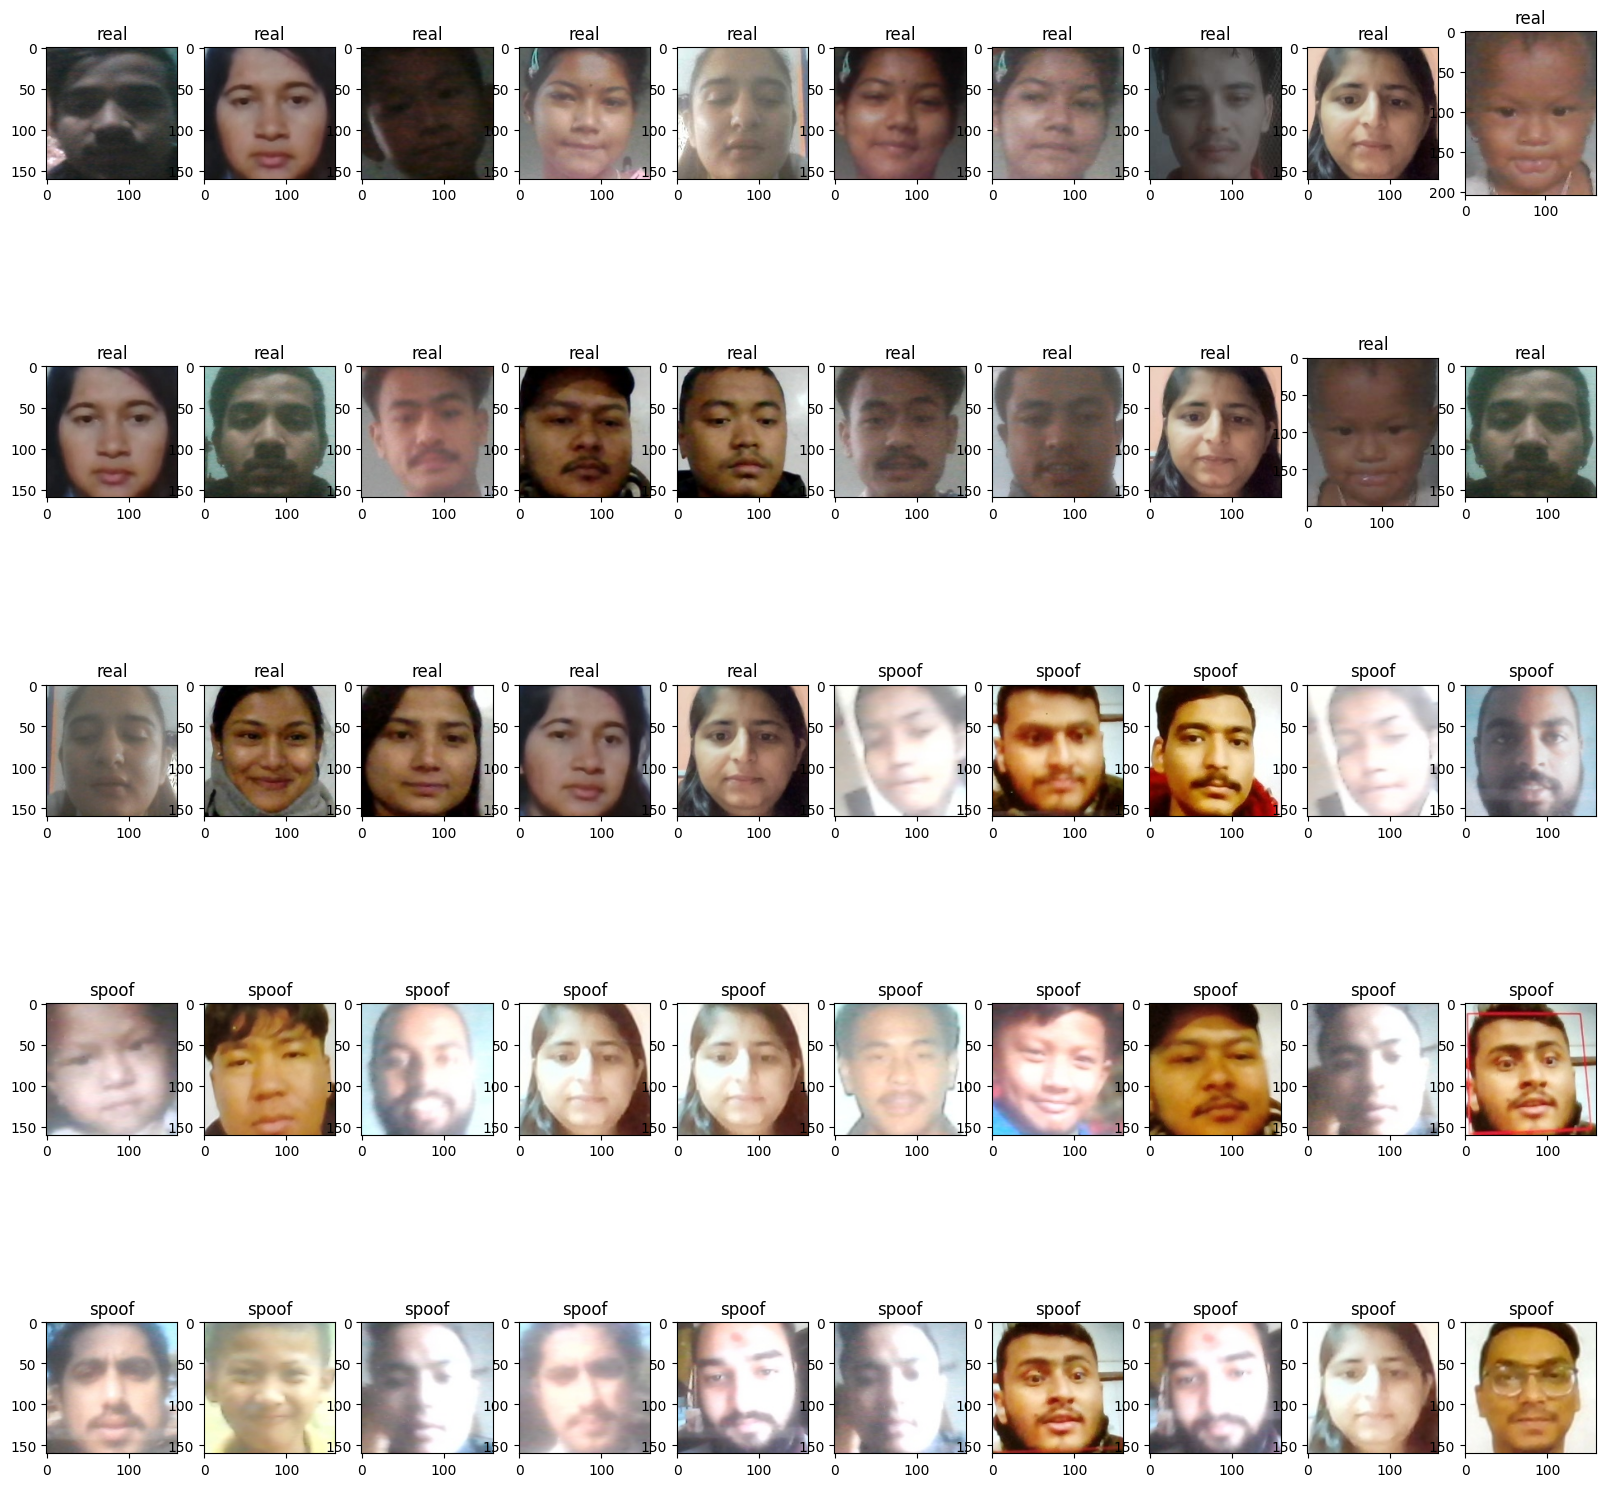

In [45]:
visualize_dataset(image_path=training_image_path, rows=5, cols=10)

In [62]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import model_from_json
import json


In [63]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2), rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)



In [65]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(160,160), color_mode='rgb', class_mode='binary', batch_size=25, shuffle=True)

Found 7481 images belonging to 2 classes.


In [66]:
valid_generator = valid_datagen.flow_from_directory(test_dir, target_size=(160,160), color_mode='rgb', class_mode='binary', batch_size=25)


Found 2737 images belonging to 2 classes.


In [67]:
mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(160,160,3)))



<ipython-input-67-07f8191ced73>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(160,160,3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [68]:
mobilenet.trainable = False



In [69]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units=8, activation='relu')(output)
prediction = Dense(1, activation='sigmoid')(output)




In [70]:
model = Model(inputs=mobilenet.input, outputs=prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,514,001 (9.59 MB)

 Trainable params: 256,017 (1000.07 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [71]:
# tell the model what cost and optimization method to use
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.000001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)


In [72]:
import os
os.mkdir('/content/model_weights')

In [75]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [81]:
model_checkpoint = ModelCheckpoint(
    './model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)


In [84]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 25,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 25,
    epochs=75,
    callbacks=[model_checkpoint]
)

Epoch 1/75
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.6702 - loss: 0.6127
Epoch 1: val_loss improved from 0.57237 to 0.57183, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.707156.weights.h5
299/299 ━━━━━━━━━━━━━━━━━━━━ 290s 961ms/step - accuracy: 0.6702 - loss: 0.6127 - val_accuracy: 0.7072 - val_loss: 0.5718
Epoch 2/75
  1/299 ━━━━━━━━━━━━━━━━━━━━ 2:53 581ms/step - accuracy: 0.6400 - loss: 0.6581
Epoch 2: val_loss improved from 0.57183 to 0.47838, saving model to ./model_weights/finalyearproject_antispoofing_model_02-0.750000.weights.h5
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6400 - loss: 0.6581 - val_accuracy: 0.7500 - val_loss: 0.4784
Epoch 3/75
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - accuracy: 0.6838 - loss: 0.5965
Epoch 3: val_loss did not improve from 0.47838
299/299 ━━━━━━━━━━━━━━━━━━━━ 274s 908ms/step - accuracy: 0.6838 - loss: 0.5965 - val_accuracy: 0.7402 - val_loss: 0.5293
Epoch 4/75
  1/299 ━━━━━━━━━━━━━━━━━━━━ 2:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions from the model
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = valid_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=valid_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [87]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=valid_generator.class_indices.keys()))


Classification Report:
              precision    recall  f1-score   support

        real       0.52      1.00      0.69      1429
       spoof       0.00      0.00      0.00      1308

    accuracy                           0.52      2737
   macro avg       0.26      0.50      0.34      2737
weighted avg       0.27      0.52      0.36      2737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
# Serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)


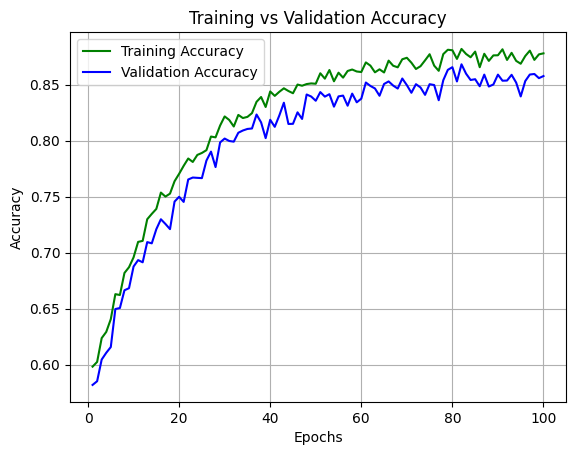

In [2]:
# Plot training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy', color='green')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color='blue')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

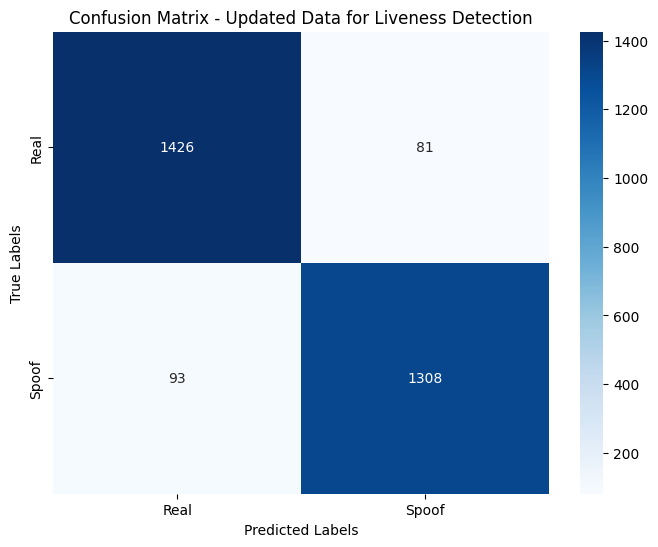

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions from the model
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = valid_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=valid_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
